In [1]:
%load_ext autoreload
%autoreload 2
from MachineLearning.dataset import *
import matplotlib.pyplot as plt

2024-04-08 11:41:11.871054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


loaded packages


In [2]:
## load data

data_folder = "/nesi/project/uoa03669/ewin313/storm_data/v2/"
train_data = get_dataset(data_folder, "MachineLearning/ConvProbPredictor/", data_version=2, zero_inputs=False)
one_train_sample = next(iter(train_data))

/opt/nesi/CS400_centos7_bdw/Python/3.11.3-gimkl-2022a/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.4.1.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


[[0.266 0.352 0.251 ... 0.002 0.    0.001]
 [0.728 0.247 0.023 ... 0.    0.    0.   ]
 [0.731 0.234 0.034 ... 0.    0.    0.   ]
 ...
 [0.178 0.334 0.275 ... 0.011 0.003 0.001]
 [0.126 0.279 0.251 ... 0.04  0.005 0.003]
 [0.12  0.25  0.276 ... 0.032 0.011 0.001]]
[15.109196    0.07867998  6.459865   -7.2244296 ]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
[[0.568 0.359 0.066 ... 0.    0.    0.   ]
 [1.    0.    0.    ... 0.    0.    0.   ]
 [1.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.101 0.237 0.301 ... 0.036 0.018 0.003]
 [0.11  0.193 0.288 ... 0.05  0.02  0.005]
 [0.161 0.264 0.29  ... 0.022 0.008 0.001]]
[  3.1969981   -0.57965845  11.721672   -12.521656  ]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
[[0.598 0.315 0.076 ... 0.    0.    0.   ]
 [0.739 0.241 0.019 ... 0.    0.    0.   ]
 [0.91  0.09  0.    ... 0.    0.    0.   ]
 ...
 [0.2   0.32  0.274 ... 0.016 0.004 0.   ]
 [0.169 0.255 0.

2024-04-08 11:44:41.226075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [ ]:
## draw genesis matrix
import matplotlib.pyplot as plt
genesis, output = one_train_sample
plt.imshow(genesis[0])
plt.xlabel("Longitude in SP Basin")
plt.ylabel("Latitude in SP Basin")
plt.title("Random Genesis map")
plt.show()

In [3]:

train_data = get_dataset(data_folder, "MachineLearning/ConvProbPredictor/", data_version=2, zero_inputs=False)
one_train_sample = next(iter(train_data))

[[0.266 0.352 0.251 ... 0.002 0.    0.001]
 [0.728 0.247 0.023 ... 0.    0.    0.   ]
 [0.731 0.234 0.034 ... 0.    0.    0.   ]
 ...
 [0.178 0.334 0.275 ... 0.011 0.003 0.001]
 [0.126 0.279 0.251 ... 0.04  0.005 0.003]
 [0.12  0.25  0.276 ... 0.032 0.011 0.001]]
[15.109196    0.07867998  6.459865   -7.2244296 ]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
[[0.568 0.359 0.066 ... 0.    0.    0.   ]
 [1.    0.    0.    ... 0.    0.    0.   ]
 [1.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.101 0.237 0.301 ... 0.036 0.018 0.003]
 [0.11  0.193 0.288 ... 0.05  0.02  0.005]
 [0.161 0.264 0.29  ... 0.022 0.008 0.001]]
[  3.1969981   -0.57965845  11.721672   -12.521656  ]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
[[0.598 0.315 0.076 ... 0.    0.    0.   ]
 [0.739 0.241 0.019 ... 0.    0.    0.   ]
 [0.91  0.09  0.    ... 0.    0.    0.   ]
 ...
 [0.2   0.32  0.274 ... 0.016 0.004 0.   ]
 [0.169 0.255 0.

KeyboardInterrupt: 

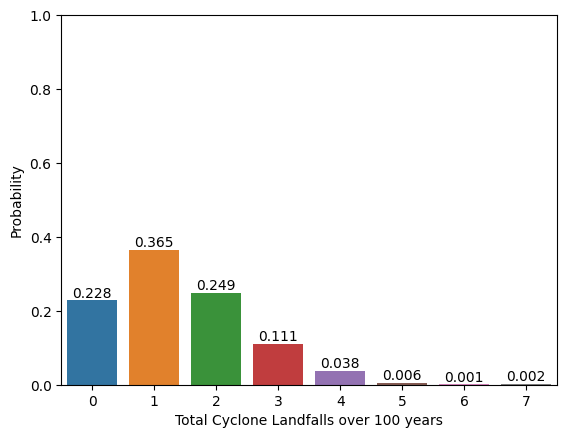

In [6]:
import seaborn as sns
import pandas as pd



inputs, output = one_train_sample
ax = sns.barplot(y=output[18][520].numpy(), x=np.arange(len(output[18][0].numpy())))
ax.set(ylim=(0,1), ylabel="Probability", xlabel="Total Cyclone Landfalls over 100 years")
for bars in ax.containers:
        ax.bar_label(bars, fmt='%.3f')

In [ ]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    x = list(range(len(data)))
    y = data
    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except  Exception as e:
            print(e)
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

bf = best_fit_distribution(output[0][540])
print(bf)


  1 / 19 : binom
'binom_gen' object has no attribute 'pdf'
  2 / 19 : bernoulli
A `bounds` sequence may not contain more than 2 elements: tuples specifying the lower and upper bounds of distribution parameters p, loc.
  3 / 19 : betabinom
'betabinom_gen' object has no attribute 'pdf'
  4 / 19 : nbinom
'nbinom_gen' object has no attribute 'pdf'
  5 / 19 : geom
A `bounds` sequence may not contain more than 2 elements: tuples specifying the lower and upper bounds of distribution parameters p, loc.
  6 / 19 : hypergeom
'hypergeom_gen' object has no attribute 'pdf'
  7 / 19 : nhypergeom
'nhypergeom_gen' object has no attribute 'pdf'
  8 / 19 : logser
A `bounds` sequence may not contain more than 2 elements: tuples specifying the lower and upper bounds of distribution parameters p, loc.
  9 / 19 : poisson
A `bounds` sequence may not contain more than 2 elements: tuples specifying the lower and upper bounds of distribution parameters mu, loc.
 10 / 19 : planck
A `bounds` sequence may not cont

(4.660071252646117e-06, -0.012278111244447793, 0.020519448456124453)


<Axes: >

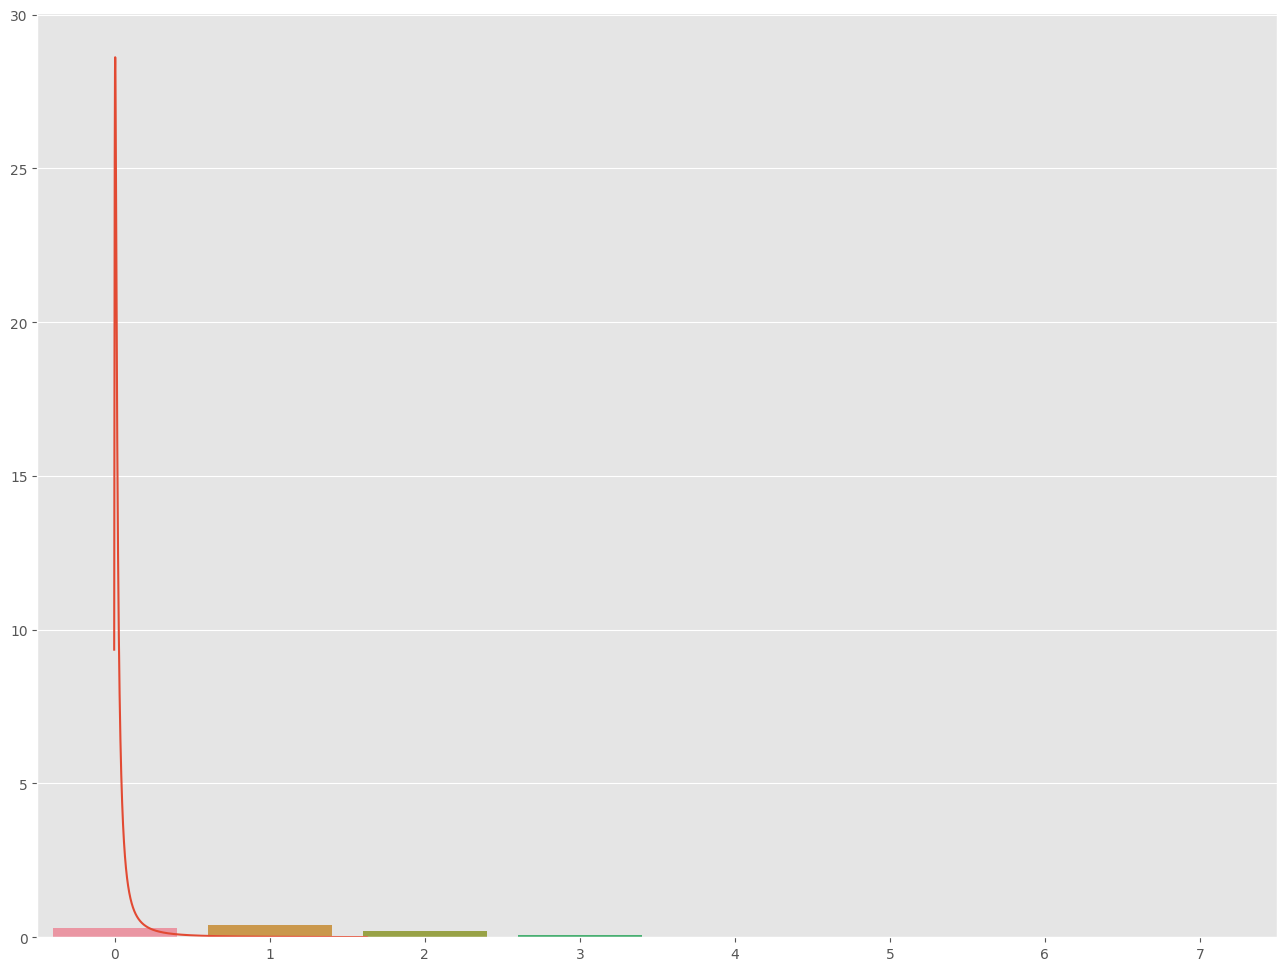

In [73]:
#best_dist = bf[0]
# Make PDF with best params 
params = st.alpha.fit(output[18][540], 2, loc=-1.5, scale=5)
print(params)
pdf = make_pdf(st.alpha,params)
ax = pdf.plot()
sns.barplot(y=output[18][540].numpy(), x=np.arange(len(output[18][0].numpy())), ax=ax)

(80, 51, 1, 0)
(1, 110, 210, 6, 5)


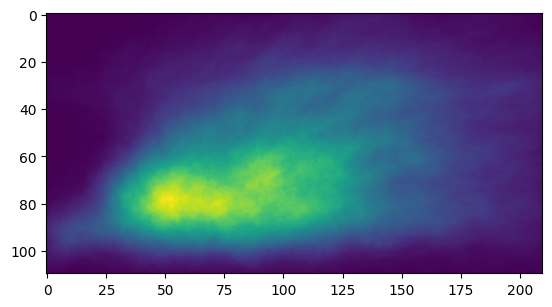

In [80]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
with h5py.File("/nesi/project/uoa03669/ewin313/TropicalCycloneAI/Training Data Generation/data/AllData_1712715937.5450797.hdf5", 'r+') as file:
    grids = file["train_grids"]
    plt.imshow(np.sum(grids[0], axis=-2)[:,:,0])
    print(np.unravel_index(np.argmax(grids[0,:,:]), grids[0].shape))
    print(grids.shape)
    #print(np.count_nonzero(grids[0,:,:,:,:,0]))
    

4828

In [60]:
4828 // 210

22

In [61]:
22 // 6

3

In [65]:
110 * 210 * 6 * 4

554400